#TENSORS

In [1]:
import torch
import numpy as np

##Tensor Initialization

Directily from data

In [2]:
data = [[1,2], [3,4]]
x_data = torch.tensor(data)

In [3]:
x_data

tensor([[1, 2],
        [3, 4]])

From a NumPy array

In [4]:
np_array = np.array(data)

#넘파이 배열에서 텐서로
x_np = torch.from_numpy(np_array)

In [5]:
x_np

tensor([[1, 2],
        [3, 4]])

From another tensor

-> 다른 텐서의 모양만 따온다

In [6]:
x_ones = torch.ones_like(x_data)
print(f"Ones Tensor: \n {x_ones} \n")

Ones Tensor: 
 tensor([[1, 1],
        [1, 1]]) 



In [7]:
x_rand = torch.rand_like(x_data, dtype=torch.float)
print(f"Random Tensor: \n {x_rand} \n")

Random Tensor: 
 tensor([[0.4522, 0.7787],
        [0.2173, 0.1374]]) 



With random or constant values

-> 크기를 결정해주는 shape을 이용해서 텐서 생성

In [8]:
shape = (2, 3, )
rand_tensor = torch.rand(shape)
ones_tensor = torch.ones(shape)
zeros_tensor = torch.zeros(shape)

print(f"Random Tensor: \n {rand_tensor} \n")
print(f"Ones Tensor: \n {ones_tensor} \n")
print(f"Zeros Tensor: \n {zeros_tensor}")

Random Tensor: 
 tensor([[0.7482, 0.5439, 0.3128],
        [0.3667, 0.6388, 0.8524]]) 

Ones Tensor: 
 tensor([[1., 1., 1.],
        [1., 1., 1.]]) 

Zeros Tensor: 
 tensor([[0., 0., 0.],
        [0., 0., 0.]])


##Tensor Attributes

In [9]:
tensor = torch.rand(3,4)

print(f"Shape of tensor: {tensor.shape}")
print(f"Datatype of tensor: {tensor.dtype}")
print(f"Device tensor is stored on: {tensor.device}")

Shape of tensor: torch.Size([3, 4])
Datatype of tensor: torch.float32
Device tensor is stored on: cpu


##Tensor Operations

연산 엄청 많다.. GPU에서 수행 가능하다

In [10]:
# We move out tensor to the GPU if available
if torch.cuda.is_available():
    tensor = tensor.to('cuda')
    print(f"Device tensor is stored on: {tensor.device}")

Device tensor is stored on: cuda:0


**Standard numpy-like indexing and slicing**

In [11]:
tensor = torch.ones(4,4)
tensor[:,1] = 0
print(tensor)

tensor([[1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.]])


**Joining tensors**

In [12]:
t1 = torch.cat([tensor, tensor, tensor], dim=1)
print(t1)

tensor([[1., 0., 1., 1., 1., 0., 1., 1., 1., 0., 1., 1.],
        [1., 0., 1., 1., 1., 0., 1., 1., 1., 0., 1., 1.],
        [1., 0., 1., 1., 1., 0., 1., 1., 1., 0., 1., 1.],
        [1., 0., 1., 1., 1., 0., 1., 1., 1., 0., 1., 1.]])


In [13]:
t2 = torch.cat([tensor, tensor, tensor], dim=0)
print(t2)

tensor([[1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.]])


**Multiplying tensors**

In [14]:
# element-wise product
print(tensor.mul(tensor))
print(tensor*tensor)

tensor([[1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.]])
tensor([[1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.]])


In [15]:
# matrix multiplication
print(tensor.matmul(tensor.T))
print(tensor @ tensor.T)

tensor([[3., 3., 3., 3.],
        [3., 3., 3., 3.],
        [3., 3., 3., 3.],
        [3., 3., 3., 3.]])
tensor([[3., 3., 3., 3.],
        [3., 3., 3., 3.],
        [3., 3., 3., 3.],
        [3., 3., 3., 3.]])


**In-place operations**

 -> _가 들어가 있으면 대체한다

In [16]:
print(tensor, "\n")
tensor.add_(5)      #replace
print(tensor)

tensor([[1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.]]) 

tensor([[6., 5., 6., 6.],
        [6., 5., 6., 6.],
        [6., 5., 6., 6.],
        [6., 5., 6., 6.]])


##Bridge with NumPy

Tensor to NumPy array

In [17]:
#텐서를 넘파이로..
t = torch.ones(5)
print(f"t: {t}")
n = t.numpy()
print(f"n: {n}")
print(type(t), type(n))

t: tensor([1., 1., 1., 1., 1.])
n: [1. 1. 1. 1. 1.]
<class 'torch.Tensor'> <class 'numpy.ndarray'>


In [18]:
t.add_(1)       #replace
print(f"t: {t}")
print(f"n: {n}")

t: tensor([2., 2., 2., 2., 2.])
n: [2. 2. 2. 2. 2.]


NumPy array to Tensor

In [19]:
n = np.ones(5)
t = torch.from_numpy(n)     #넘파이에서 텐서로..

In [20]:
np.add(n, 1, out=n)     #바뀜..
print(f"t: {t}")
print(f"n: {n}")

t: tensor([2., 2., 2., 2., 2.], dtype=torch.float64)
n: [2. 2. 2. 2. 2.]


#A GENTLE INTRODUCTION TO TORCH.AUTOGRAD

##Background

- forward propagation : input이 nn을 거치면서 prediction을 뽑아내는 과정

- backward propagation : 정답 label과 모델의 prediction을 비교하는 loss를 구해서 미분을 진행 -> 미분값을 바탕으로 weight과 bias를 업데이트를 함

##Using in PyTorch

- can use GPU

In [21]:
import torch, torchvision
model = torchvision.models.resnet18(pretrained=True)
data = torch.rand(1, 3, 64, 64)     #batch, channel, size, size
labels = torch.rand(1, 1000)        #labels

Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth


  0%|          | 0.00/44.7M [00:00<?, ?B/s]

In [22]:
prediction = model(data)        #forward pass

In [23]:
loss = (prediction - labels).sum()
loss.backward()     #backward pass

In [24]:
#optimizer 생성
optim = torch.optim.SGD(model.parameters(), lr=1e-2, momentum=0.9)

In [25]:
#경사하강법 시작

#grad = grad - lr*grad
optim.step()        #gradient descent

##Differentiation in Autograd

In [26]:
#requires_grad=True로 설정 시 diffrentiation 가능

import torch

a = torch.tensor([2., 3.], requires_grad=True)
b = torch.tensor([6., 4.], requires_grad=True)

$Q = 3a^3 - b^2$

- $dQ/da = 9a^2$
- $dQ/db = -2b$

In [27]:
#Q is tensor also
Q = 3*a**3 - b**2

In [28]:
externel_grad = torch.tensor([1., 1.])      #upstreaming grad 설정
Q.backward(gradient=externel_grad)

In [29]:
#check gradient
print(a.grad)
print(b.grad)

tensor([36., 81.])
tensor([-12.,  -8.])


Vector Calculation을 해야할 수도 있다.

##Computational Graph

- (2) is input datas

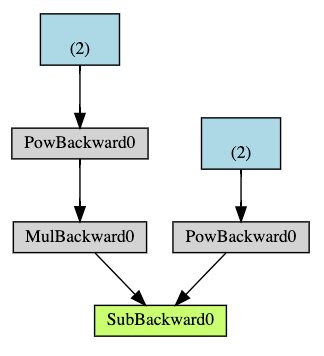

Exclusion from the DAG

- requires_grad = True인 tensor가 하나라도 있으면 differentiation 가능

In [30]:
x = torch.rand(5, 5)
y = torch.rand(5, 5)
z = torch.rand((5, 5), requires_grad=True)

a = x + y
print(f"Does `a` require gradients? : {a.requires_grad}")
b = x + z
print(f"Does `b` require gradients?: {b.requires_grad}")

Does `a` require gradients? : False
Does `b` require gradients?: True


Finetuning 시 Layer들을 Freeze시킬 때 사용

In [31]:
from torch import nn, optim

model = torchvision.models.resnet18(pretrained=True)

# Freeze all the parameters in the network
for param in model.parameters():
    param.requires_grad = False

In [32]:
# Finetune the last classifier

model.fc = nn.Linear(512, 10)

In [33]:
# Optimize only the classifier

optimizer = optim.SGD(model.parameters(), lr=1e-2, momentum=0.9)

In [34]:
# All no grad update except last two params(weight and bias for classifier)
for param in model.parameters():
    print(param.requires_grad)

False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
True
True


In [35]:
print(model)

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

#NEURAL NETWORKS

torch.nn에 layer들이 다 있음

**Typical training procedure for a neural network**

- Define NN that has learnable params
- Iterate over a dataset the network
- Process input through the network
- Compute the loss
- Backpropagation
- Update weights

###1. Define NN



In [36]:
import torch
import torch.nn as nn
import torch.nn.functional as F

In [37]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        # 1 input image channel, 6 output channels
        # 5x5 square convolution kernel
        self.conv1 = nn.Conv2d(1, 6, 5)
        self.conv2 = nn.Conv2d(6, 16, 5)
        # an affine operation: y = Wx + b
        self.fc1 = nn.Linear(16 * 5 * 5, 120)  # 5*5 from image dimension
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        # Max pooling over a (2, 2) window
        x = F.max_pool2d(F.relu(self.conv1(x)), (2, 2))
        # If the size is a square, you can specify with a single number
        x = F.max_pool2d(F.relu(self.conv2(x)), 2)
        x = torch.flatten(x, 1) # flatten all dimensions except the batch dimension
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x


net = Net()
print(net)

Net(
  (conv1): Conv2d(1, 6, kernel_size=(5, 5), stride=(1, 1))
  (conv2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=400, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)


In [38]:
# check params

params = list(net.parameters())
print(len(params))
print(params[0].size())  # conv1's .weight

10
torch.Size([6, 1, 5, 5])


In [39]:
# check outputs

input = torch.randn(1, 1, 32, 32)
out = net(input)
print(out)

tensor([[ 0.0129,  0.0422, -0.0129,  0.0664, -0.0664,  0.0964, -0.1847,  0.0749,
         -0.0340, -0.0607]], grad_fn=<AddmmBackward0>)


In [40]:
net.zero_grad()

#torch.randn(1, 10) 은 loss가 vector의 모양이라는 뜻
out.backward(torch.randn(1, 10))

###Loss Function

In [41]:
output = net(input)
target = torch.randn(10)       # a dummy target
target = target.view(1, -1)     # reshape as output
criterion = nn.MSELoss()

loss = criterion(output, target)
print(loss)

tensor(0.8682, grad_fn=<MseLossBackward0>)


###Backprop

In [42]:
net.zero_grad()     # zeroes the gradient buffers of all parameters

print('conv1.bias.grad before backward')
print(net.conv1.bias.grad)

loss.backward()     # getting gradients

print('conv1.bias.grad after backward')
print(net.conv1.bias.grad)

conv1.bias.grad before backward
tensor([0., 0., 0., 0., 0., 0.])
conv1.bias.grad after backward
tensor([-0.0069, -0.0102, -0.0081,  0.0085, -0.0127, -0.0066])


###Update the weights

weight = weight - learning_rate * gradient

In [43]:
# simple implement

learning_rate = 0.01
for f in net.parameters():
    f.data.sub_(f.grad.data * learning_rate)

In [44]:
# with library

import torch.optim as optim

# create optimizer
optimizer = optim.SGD(net.parameters(), lr=0.01)

# in your training loop:
optimizer.zero_grad()       # zero the gradient buffers
output = net(input)
loss = criterion(output, target)
loss.backward()
optimizer.step()        #Does the update

#TRAINING A CLASSIFIER

##What about data?

with CIFAR-10

##Training an image classifier

**Steps**

1. Load and normalize the CIFAR10 training and test datasets using torchvision
2. Define a Convolutional Neural Network
3. Define a loss function
4. Train the network on the training data
5. Test the network on the test data

###1. Load and normalize CIFAR10

In [45]:
import torch
import torchvision
import torchvision.transforms as transforms

In [46]:
transform = transforms.Compose(
    [transforms.ToTensor(),     # make image data to tensor
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))]    #normalize
     )

batch_size = 4

# dataset and dataloader
trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size,
                                          shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size,
                                         shuffle=False, num_workers=2)

# labels
classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

  0%|          | 0/170498071 [00:00<?, ?it/s]

Extracting ./data/cifar-10-python.tar.gz to ./data
Files already downloaded and verified


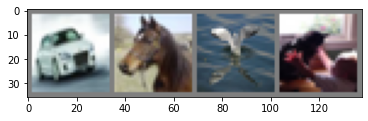

car   horse bird  cat  


In [47]:
import matplotlib.pyplot as plt
import numpy as np

# functions to show an image
def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()


# get some random training images
dataiter = iter(trainloader)
images, labels = dataiter.next()

# show images
imshow(torchvision.utils.make_grid(images))
# print labels
print(' '.join(f'{classes[labels[j]]:5s}' for j in range(batch_size)))

###2. Define a Convolutional Neural Network

In [48]:
import torch.nn as nn
import torch.nn.functional as F


class Net(nn.Module):
    def __init__(self):
        super().__init__()
        # set the starting channer of model same as input channel
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = torch.flatten(x, 1) # flatten all dimensions except batch
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x


net = Net()

In [49]:
print(net)

Net(
  (conv1): Conv2d(3, 6, kernel_size=(5, 5), stride=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=400, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)


###3. Define a Loss function and optimizer

In [50]:
import torch.optim as optim

# Cross-Entropy and SGD with momentum
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

####4. Train the network

- 3 epochs : 전체 dataset을 3번 순회
- 2000번마다 check

In [51]:
for epoch in range(3):  # loop over the dataset multiple times

    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        if i % 2000 == 1999:    # print every 2000 mini-batches
            print(f'[{epoch + 1}, {i + 1:5d}] loss: {running_loss / 2000:.3f}')
            running_loss = 0.0

print('Finished Training')

[1,  2000] loss: 2.220
[1,  4000] loss: 1.884
[1,  6000] loss: 1.689
[1,  8000] loss: 1.606
[1, 10000] loss: 1.534
[1, 12000] loss: 1.479
[2,  2000] loss: 1.423
[2,  4000] loss: 1.389
[2,  6000] loss: 1.379
[2,  8000] loss: 1.354
[2, 10000] loss: 1.346
[2, 12000] loss: 1.333
[3,  2000] loss: 1.255
[3,  4000] loss: 1.252
[3,  6000] loss: 1.256
[3,  8000] loss: 1.254
[3, 10000] loss: 1.217
[3, 12000] loss: 1.178
Finished Training


In [52]:
# Save model

PATH = './cifar_net.pth'
torch.save(net.state_dict(), PATH)

###5. Test the network on the test data

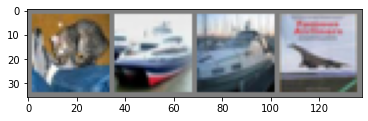

GroundTruth:  cat   ship  ship  plane


In [53]:
# test set에서 데이터 뽑기
dataiter = iter(testloader)
images, labels = dataiter.next()

# print images
imshow(torchvision.utils.make_grid(images))
print('GroundTruth: ', ' '.join(f'{classes[labels[j]]:5s}' for j in range(4)))

In [54]:
# Load model

net = Net()
net.load_state_dict(torch.load(PATH))

<All keys matched successfully>

In [55]:
# make prediction with test data

output = net(images)

In [56]:
# scores for each classes

print(output)

tensor([[-0.4202, -1.2412, -0.4229,  3.0442, -1.4053,  1.0198,  0.5182, -0.9293,
          0.4735, -1.0244],
        [ 6.0595,  6.0099, -4.3463, -4.5339, -2.5075, -6.6447, -5.7182, -3.3595,
         11.9957,  6.4888],
        [ 2.4506,  2.5048, -0.5534, -1.3969, -0.3242, -2.4788, -2.9885, -1.3108,
          2.2971,  2.5042],
        [ 3.5140,  1.4739, -1.1744, -1.8274, -0.2775, -3.2635, -2.3874, -3.1465,
          6.1458,  1.5972]], grad_fn=<AddmmBackward0>)


In [57]:
a, predicted = torch.max(outputs, 1)

print('Predicted: ', ' '.join(f'{classes[predicted[j]]:5s}'
                              for j in range(4)))

Predicted:  deer  plane frog  bird 


In [58]:
print(predicted)

tensor([4, 0, 6, 2])


In [59]:
correct = 0
total = 0
# since we're not training, we don't need to calculate the gradients for our outputs
with torch.no_grad():
    for data in testloader:
        images, labels = data
        # calculate outputs by running images through the network
        outputs = net(images)
        # the class with the highest energy is what we choose as prediction
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

# accuracy for all test data
print(f'Accuracy of the network on the 10000 test images: {100 * correct // total} %')

Accuracy of the network on the 10000 test images: 55 %


In [60]:
# prepare to count predictions for each class
correct_pred = {classname: 0 for classname in classes}
total_pred = {classname: 0 for classname in classes}

# again no gradients needed
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = net(images)
        _, predictions = torch.max(outputs, 1)
        # collect the correct predictions for each class
        for label, prediction in zip(labels, predictions):
            # label 별로 맞으면 correct에 + 1
            if label == prediction:
                correct_pred[classes[label]] += 1
            # label 별 count + 1
            total_pred[classes[label]] += 1

# print accuracy for each class
for classname, correct_count in correct_pred.items():
    accuracy = 100 * float(correct_count) / total_pred[classname]
    print(f'Accuracy for class: {classname:5s} is {accuracy:.1f} %')

Accuracy for class: plane is 62.9 %
Accuracy for class: car   is 64.5 %
Accuracy for class: bird  is 33.7 %
Accuracy for class: cat   is 47.1 %
Accuracy for class: deer  is 64.1 %
Accuracy for class: dog   is 34.0 %
Accuracy for class: frog  is 43.4 %
Accuracy for class: horse is 70.0 %
Accuracy for class: ship  is 79.3 %
Accuracy for class: truck is 54.9 %


##Training on GPU

In [61]:
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')

# Assuming that we are on a CUDA machine, this should print a CUDA device:

print(device)

cuda:0


In [62]:
net.to(device)

Net(
  (conv1): Conv2d(3, 6, kernel_size=(5, 5), stride=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=400, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)

In [63]:
inputs, labels = data[0].to(device), data[1].to(device)